# Examples of feature extraction

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import immas
from immas import MammogramImage
from immas.basic_functions import show_image_plt

## Feature extraction using MammogramImage class

Let's read sample mammogram image first

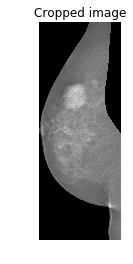

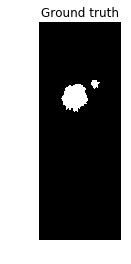

In [2]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, ground_truth_path=path_ground_truth, pmuscle_mask_path=pectoral_muscle)

show_image_plt(mm.image_data,'Cropped image')
show_image_plt(mm.cropped_ground_truth,'Ground truth')

Now we can do features and contours extraction using `get_img_features` function, by default it selects 10 biggest (by area) false positive contours, and true positive contours (masses) if any available.

In [3]:
features, contours = mm.get_img_features()

help(mm.get_img_features)

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


Help on method get_img_features in module immas.io.mammogram:

get_img_features(contour_max_number=10) method of immas.io.mammogram.MammogramImage instance
    Finds mass candidates contours and their features.
    
    Args:
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



Let's check what output we have. `class_id` field equals to 1 for true positive (masses) and -1 for false positive (not masses). Please pay attention that features are returned in `pandas.DataFrame` format.

In [4]:
features

perimeter      area  circularity            ac  mean_intensity  \
0    840.852812   15244.0     3.690890   4130.168616    32564.786239   
1    469.781744    7421.5     2.366414   3136.179958    32942.014517   
2    503.740114    5976.0     3.379034   1768.552550    32598.760810   
3    373.455844    4293.0     2.585281   1660.554455    33611.502122   
4    362.284271    3810.0     2.741348   1389.827363    32656.269057   
5    310.041630    3402.5     2.248185   1513.443137    32419.812658   
6    295.698484    3319.5     2.096118   1583.642007    32924.413395   
7    287.798990    3053.0     2.158946   1414.115697    32762.653834   
8    274.870057    2666.5     2.254776   1182.600817    33212.127454   
9    267.798990    2604.0     2.191629   1188.157342    32850.051170   
10  1743.599186  120333.5     2.010467  59853.513050    32640.330093   
11   485.043720   11603.0     1.613547   7190.989862    32559.567073   

    standard_deviation  smoothness      skewness  class_id  
0         19025.671417         1.0  6.898285e+10      -1.0  
1         18901.707121         1.0  2.153003e+09      -1.0  
2         19036.268850         1.0  4.850209e+10      -1.0  
3         18996.723723         1.0 -1.212079e+11      -1.0  
4         18669.309304         1.0  3.615419e+09      -1.0  
5         18924.156407         1.0  8.411224e+10      -1.0  
6         18998.025002         1.0 -1.288015e+11      -1.0  
7         18944.126990         1.0  1.256461e+11      -1.0  
8         19213.513195         1.0 -3.230391e+11      -1.0  
9         18623.262218         1.0 -1.448441e+11      -1.0  
10        18904.684220         1.0  6.647140e+08       1.0  
11        18845.800389         1.0  1.638218e+10       1.0

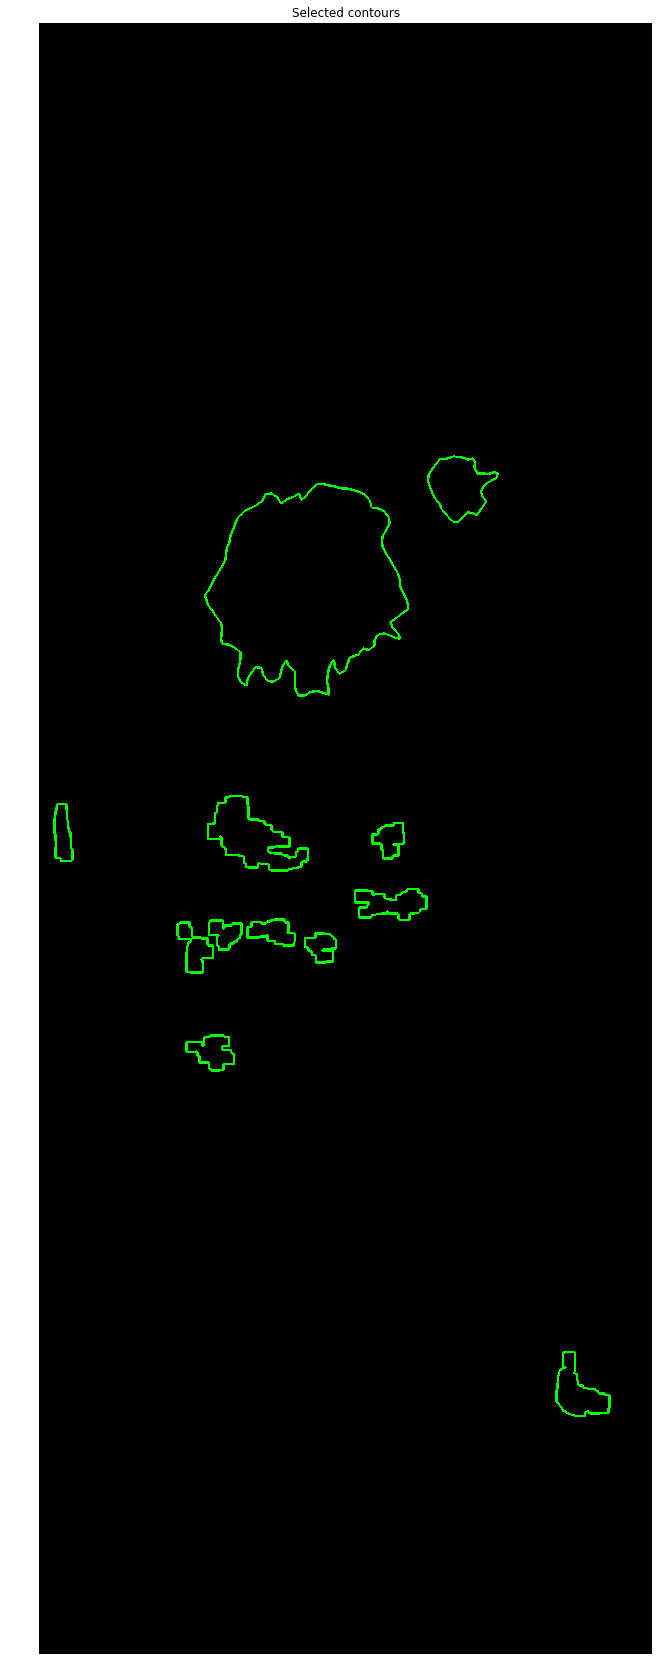

In [5]:
mm_shape = mm.image_data.shape

img_color = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color, contours, -1, (0,255,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color,'Selected contours')

## Feature extraction using get_img_features function

Features can be extracted from mammogram images using this helper function as well. We need to provide ground thruth mask separately.

In [25]:
from immas import get_img_features

help(get_img_features)

Help on function get_img_features in module immas.features.get_features:

get_img_features(img, mask_ground_truth=None, contour_max_number=10)
    Function calculates features of the given image. Class id for the true positive is 1,
    and for the false positive (not masses) -1.
    
    Args:
        img (numpy.array): image, which features to find
        mask_ground_truth (np.array): mask for extracting mass region, default is None.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



In [26]:
features2, contours2 = get_img_features(mm.image_data)

/home/okozyn/Projects/immas/immas/segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [27]:
features2

perimeter     area  circularity           ac  mean_intensity  \
0  3730.790428  98674.0    11.225071  8790.500926    32605.740959   
1  4224.076784  23302.5    60.932813   382.429415    32682.298070   
2  2123.929265  12183.0    29.465648   413.464526    32596.632523   
3   964.354461   7791.5     9.498225   820.311172    32766.357361   
4  1184.888512   5667.5    19.713039   287.500063    33529.324276   
5  1136.420477   4818.0    21.330520   225.873538    32298.799508   
6  1393.682449   4751.5    32.530225   146.064161    32703.288885   
7   549.612259   3826.0     6.282869   608.957485    32882.951665   
8  1219.917949   2752.5    43.025314    63.973966    32506.762227   
9   766.004175   2041.0    22.877544    89.214121    32094.653503   

   standard_deviation  smoothness      skewness  class_id  
0        18878.544965         1.0  1.713565e+10      -1.0  
1        19071.931634         1.0 -2.158255e+10      -1.0  
2        18801.860807         1.0 -2.345094e+09      -1.0  
3        18938.463817         1.0  4.447417e+10      -1.0  
4        18959.452991         1.0 -1.479250e+11      -1.0  
5        18939.138184         1.0  1.376212e+11      -1.0  
6        18810.358412         1.0  4.602172e+10      -1.0  
7        19062.852484         1.0 -1.526180e+11      -1.0  
8        18756.725175         1.0  2.003122e+11      -1.0  
9        18755.224715         1.0  2.747701e+11      -1.0

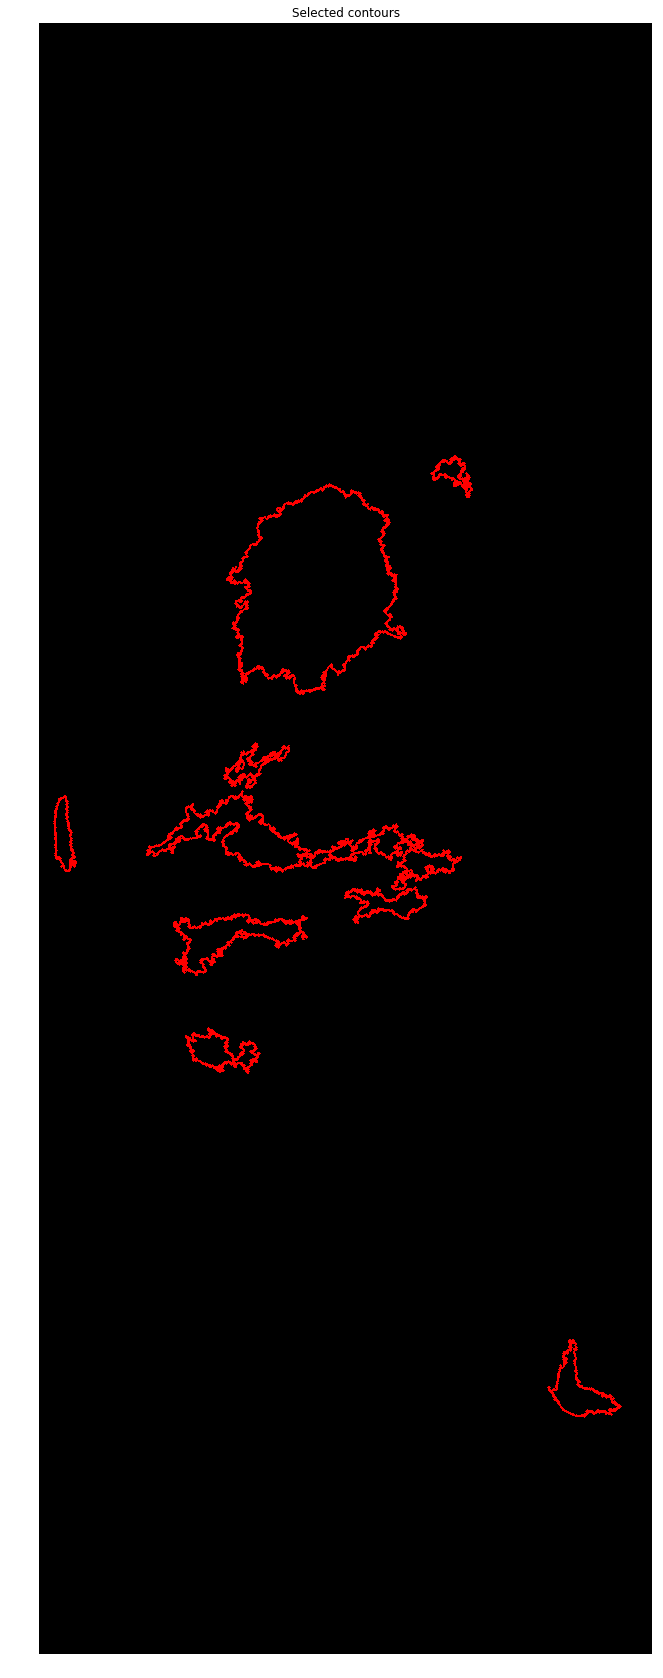

In [28]:
mm_shape = mm.image_data.shape

img_color2 = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color2, contours2, -1, (255,0,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color2,'Selected contours')

## Reading features of several images

`get_dataset_features` function can be used for feature extraction from whole dataset.

In [4]:
from immas import get_dataset_features

help(get_dataset_features)

Help on function get_dataset_features in module immas.features.get_features:

get_dataset_features(data, contour_max_number=10)
    Function returns list of features for all of the mammograms.
    
    Args:
        data ([MammogramImage]): list (iterable) of the mammograms from dataset.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
    
    Returns:
        pandas.DataFrame: feature of all images combined in one data table.



In [2]:
# let's create sample dataset of two images
path_image1 = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask1 = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth1 = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle1 = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

path_image2 = "../dataset/images/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"
path_mask2 = "../dataset/masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.png"
pectoral_muscle2 = "../dataset/pectoral_muscle_masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"

mm1 = MammogramImage(path_image1, 
                     path_mask1, 
                     ground_truth_path=path_ground_truth1, 
                     pmuscle_mask_path=pectoral_muscle1,
                     load_data=False)
mm2 = MammogramImage(path_image2, 
                     path_mask2, 
                     pmuscle_mask_path=pectoral_muscle2,
                     load_data=False)
dataset = [mm1, mm2]

In [13]:
# read features of all images in the dataset,with no limitation on the number of extracted regions
dataset_features = get_dataset_features(dataset, contour_max_number=None)

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [14]:
dataset_features

perimeter     area  circularity           ac  mean_intensity  \
0    840.852812  15244.0     3.690890  4130.168616    32564.786239   
1    469.781744   7421.5     2.366414  3136.179958    32942.014517   
2    503.740114   5976.0     3.379034  1768.552550    32598.760810   
3    373.455844   4293.0     2.585281  1660.554455    33611.502122   
4    362.284271   3810.0     2.741348  1389.827363    32656.269057   
5    310.041630   3402.5     2.248185  1513.443137    32419.812658   
6    295.698484   3319.5     2.096118  1583.642007    32924.413395   
7    287.798990   3053.0     2.158946  1414.115697    32762.653834   
8    274.870057   2666.5     2.254776  1182.600817    33212.127454   
9    267.798990   2604.0     2.191629  1188.157342    32850.051170   
10   274.627417   2271.0     2.642779   859.322829    32963.147963   
11   268.384776   2219.5     2.582562   859.417927    32524.012755   
12   256.970562   2185.0     2.404947   908.544066    33034.637111   
13   164.142135   1560.0     1.374376  1135.060218    32501.315052   
14   161.071068   1471.5     1.403023  1048.806383    32255.613402   
15   168.142135   1444.0     1.558031   926.810901    32553.334643   
16   149.313708   1312.0     1.352246   970.237756    32863.175325   
17   151.656854   1120.0     1.634166   685.364844    32784.839465   
18   142.485281   1040.0     1.553448   669.478346    33419.099010   
19   153.656854    988.0     1.901678   519.541062    33705.957746   
20   123.071068    890.5     1.353531   657.908921    33499.365546   
21   112.242641    787.5     1.273079   618.579094    33193.218009   
22   111.071068    785.5     1.249815   628.492862    33438.033294   
23   113.656854    785.0     1.309519   599.456833    32830.230404   
24   116.242641    775.5     1.386562   559.297057    32632.399281   
25   108.828427    733.0     1.285792   570.076461    33541.232234   
26    99.414214    617.5     1.273650   484.827031    33925.657186   
27    92.828427    547.0     1.253617   436.337494    31849.094276   
28    92.828427    544.0     1.260530   431.564467    32620.475465   
29    92.828427    540.0     1.269867   425.241264    32546.197615   
..          ...      ...          ...          ...             ...   
237   80.000000    399.0     1.276431   312.590433    33202.975000   
238   80.000000    399.0     1.276431   312.590433    31690.568182   
239   85.414214    396.5     1.464223   270.792078    32530.409091   
240   84.828427    394.0     1.453372   271.093734    32588.636156   
241   78.000000    380.0     1.274077   298.255082    31395.695238   
242   78.000000    380.0     1.274077   298.255082    33840.921429   
243   78.000000    380.0     1.274077   298.255082    32225.469048   
244   78.000000    380.0     1.274077   298.255082    33271.052381   
245   78.000000    380.0     1.274077   298.255082    32509.621429   
246   78.000000    380.0     1.274077   298.255082    32516.314286   
247   78.000000    380.0     1.274077   298.255082    33231.380952   
248   78.000000    380.0     1.274077   298.255082    32505.621429   
249   81.414214    372.5     1.416003   263.064324    32501.533816   
250   76.000000    361.0     1.273240   283.528737    32187.842500   
251   76.000000    361.0     1.273240   283.528737    32934.880000   
252   76.000000    361.0     1.273240   283.528737    34032.557500   
253   76.000000    361.0     1.273240   283.528737    32002.760000   
254   76.000000    361.0     1.273240   283.528737    34012.557500   
255   76.000000    361.0     1.273240   283.528737    32591.240000   
256   76.000000    361.0     1.273240   283.528737    33417.040000   
257   76.000000    361.0     1.273240   283.528737    31347.640000   
258   76.000000    361.0     1.273240   283.528737    34761.330000   
259   76.000000    361.0     1.273240   283.528737    33548.037500   
260   76.000000    361.0     1.273240   283.528737    33899.220000   
261   87.414214    352.5     1.725024   204.344991    33222.957179   
262   80.000000 

In [16]:
# select only rows which represent masses
dataset_features.loc[dataset_features['class_id'] == 1]

perimeter      area  circularity            ac  mean_intensity  \
72  1743.599186  120333.5     2.010467  59853.513050    32640.330093   
73   485.043720   11603.0     1.613547   7190.989862    32559.567073   

    standard_deviation  smoothness      skewness  class_id  
72        18904.684220         1.0  6.647140e+08       1.0  
73        18845.800389         1.0  1.638218e+10       1.0

### Our dataset features can be easily saved into `.csv` file for futher usage

In [23]:
dataset_features.to_csv("./sample-features.csv")